In [2]:
import pandas as pd
# import numpy as np
# import re
# import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/floramatos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [4]:
cleaned_tweets_df = pd.read_csv('resources/dataset/cleaned_tweets.csv')
cleaned_tweets_df

,location,tweetcreatedts,text,country
0,Ukraine,2022-02-24,the world must act immediately is at stake ...,ukraine
1,Pakistan,2022-02-24,the historic moment when the pm of pakistan mr...,pakistan
2,"Texas, USA",2022-02-24,real stand against against,usa
3,United States,2022-02-24,breaking over ukrainian military casualties...,usa
4,"Newcastle, UK",2022-02-24,despite all the threats and warnings the trag...,uk
...,...,...,...,...
136757,Sydney,2022-02-27,is harder to penetrate than the,australia
136758,"New Delhi, India",2022-02-27,which today is a bully had once knelt bef...,india
136759,"Gosport, England",2022-02-27,small man syndrome,uk
136760,"Mississippi, USA",2022-02-27,what it sounds like in my head if we sent some...,usa


In [5]:
# Function to create wordcloud in case we're doing more than one
# Define a function to plot word cloud
# def plot_cloud(wordcloud):
#     # Set figure size
#     plt.figure(figsize=(40, 30))
#     # Display image
#     plt.imshow(wordcloud) 
#     # No axis details
#     plt.axis("off");

# From: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

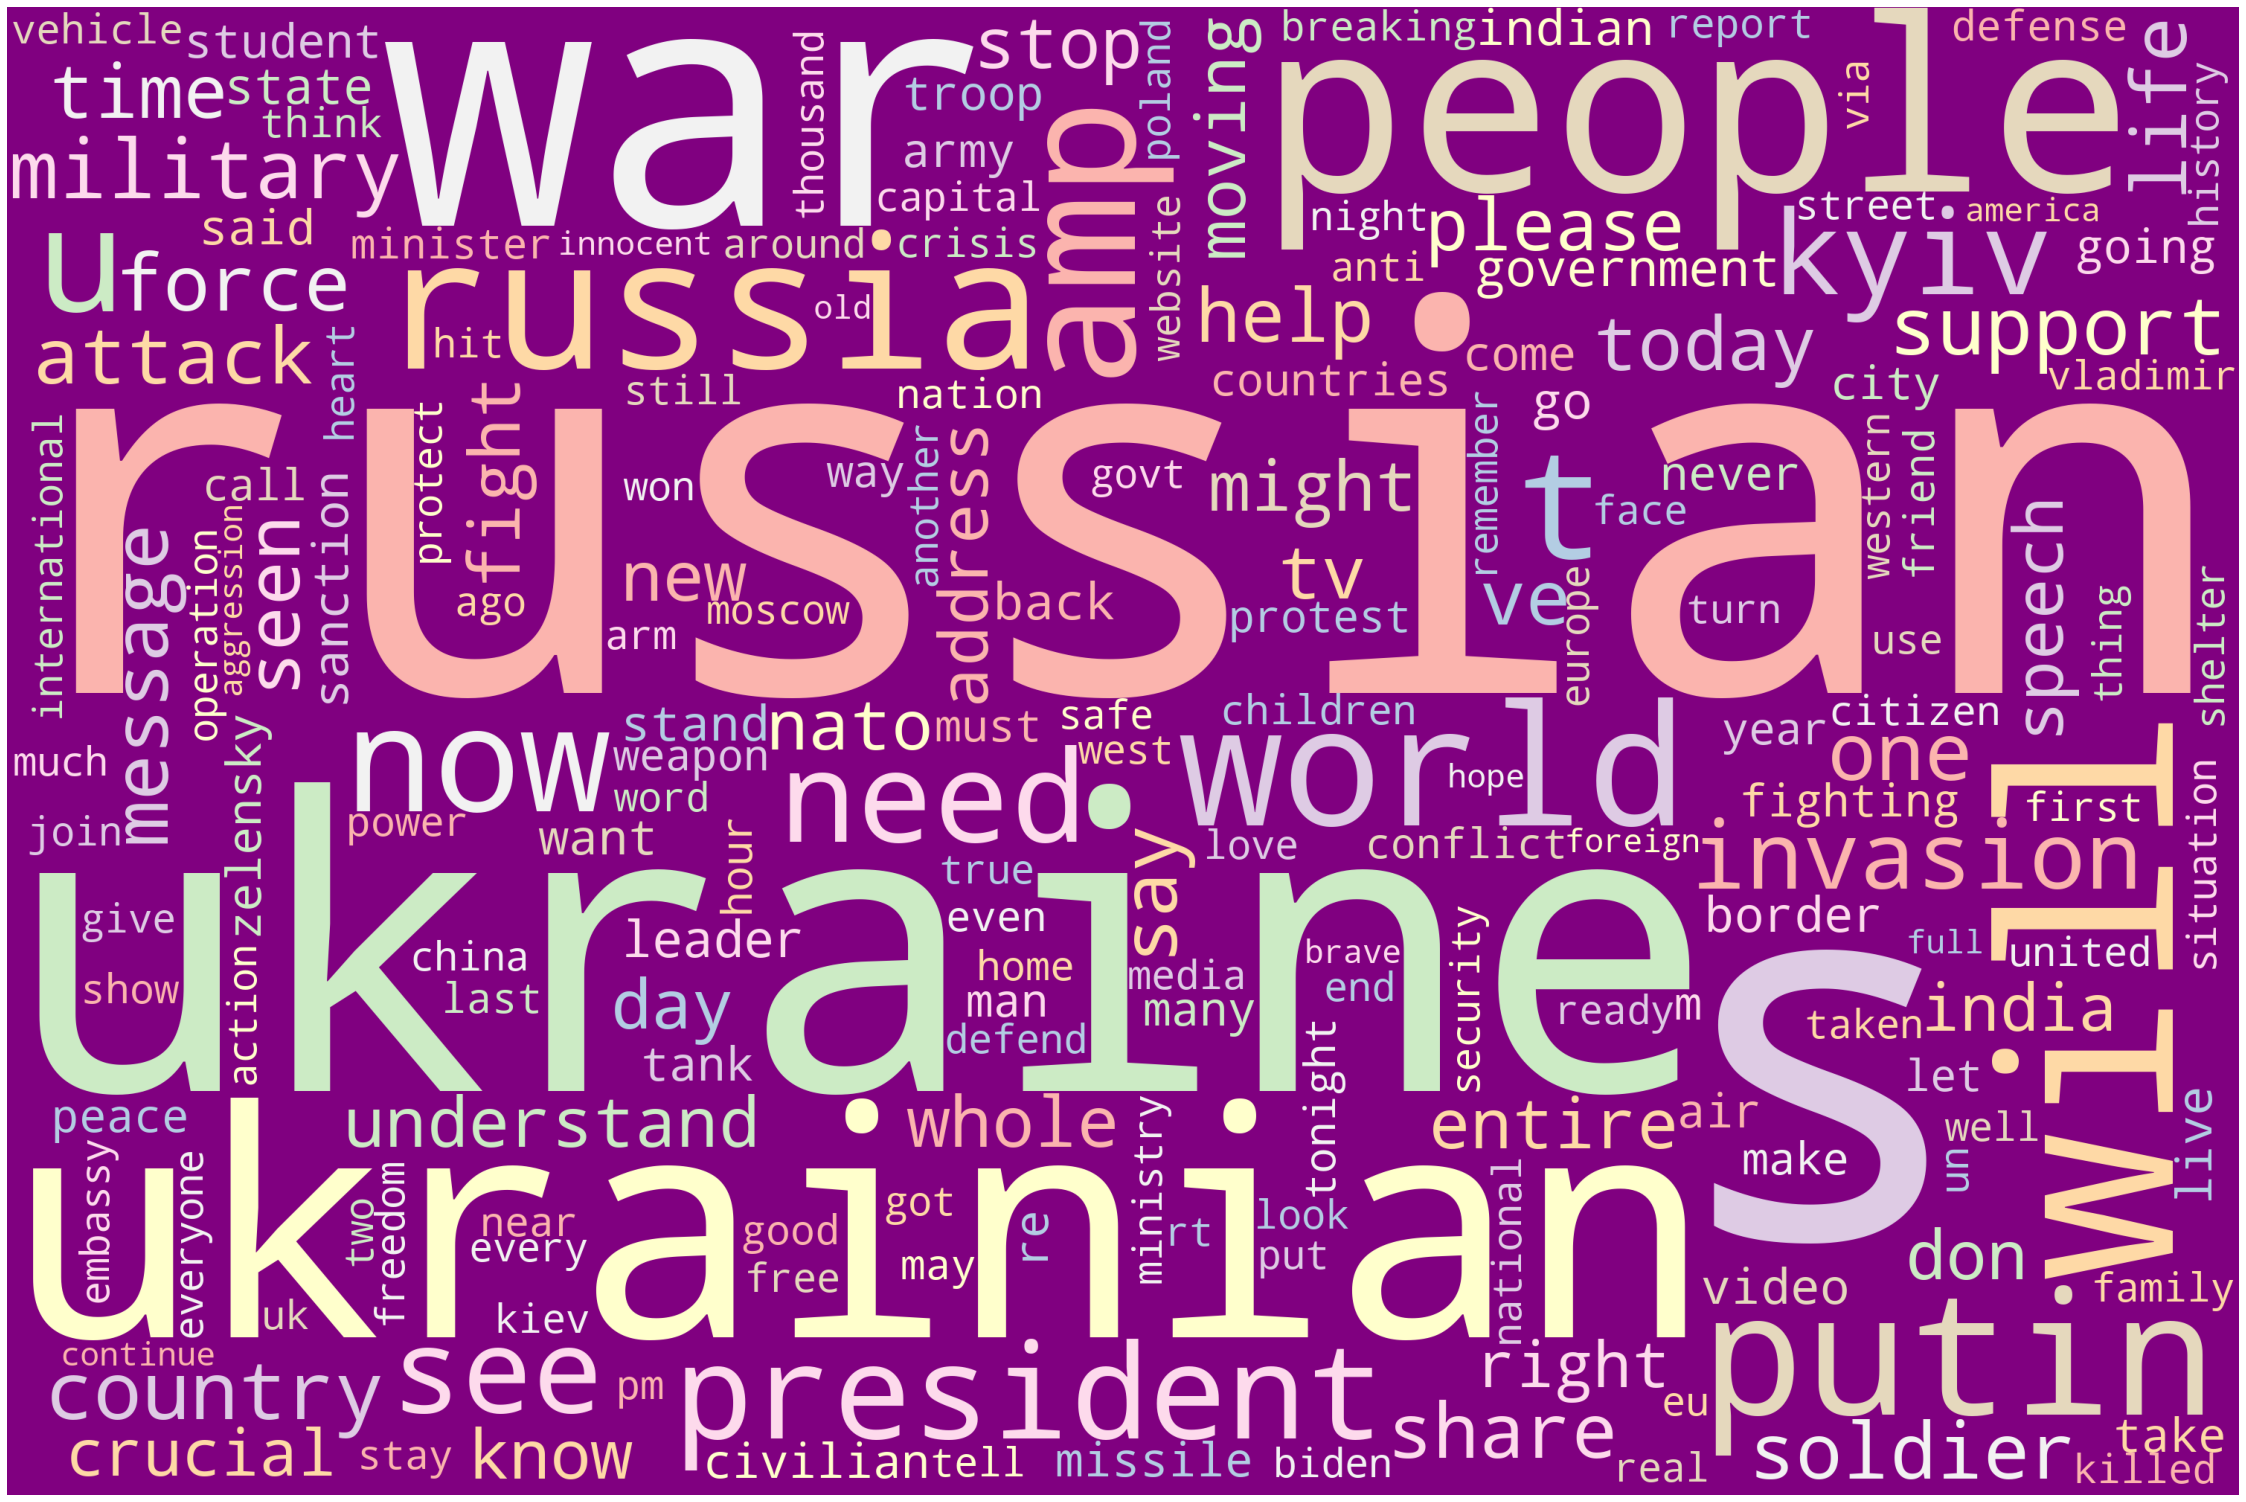

In [13]:
# create word cloud with most frequent words
# used stopwords from wordcloud 
text = cleaned_tweets_df["text"].values
words = ' '.join([words for words in text])
stopwords = list(STOPWORDS)
wordcloud = WordCloud(width= 3000, height = 2000, stopwords=stopwords, background_color="purple", colormap='Pastel1', random_state=1, collocations=False).generate(words)
# background_color="salmon", 'black', 'white'
# colormap='Dark2', 'Paired', 'Set2', 'Pastel1'
# max_font_size=50, min_font_size=7, max_words=100
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
# Save image
wordcloud.to_file("resources/images/wordcloud.png")

In [15]:
# list of wordcloud stopwords
print(stopwords)

['ought', 'just', 'out', 'no', 'them', "i'll", 'they', "hasn't", 'the', 'off', 'doing', 'that', 'a', 'between', 'who', "shan't", 'by', "we'll", "can't", 'had', "how's", 'ever', "couldn't", 'once', 'should', 'under', 'very', 'ours', 'how', "let's", 'against', 'themselves', "we'd", "shouldn't", 'of', "that's", 'both', 'could', "why's", 'it', 'http', 'then', "won't", 'or', 'until', 'can', 'been', 'through', "wasn't", 'she', "doesn't", 'like', 'his', 'your', "you'll", 'down', "they'd", "don't", 'an', 'its', 'am', 'some', "there's", "she's", "here's", "mustn't", 'cannot', "he'll", "haven't", 'which', 'each', 'otherwise', 'all', 'him', "isn't", "they've", 'whom', "i'm", 'therefore', 'on', 'while', "wouldn't", 'else', 'why', 'during', 'own', 'i', 'more', 'with', 'above', 'would', 'so', 'itself', 'is', 'having', "i'd", "when's", "she'll", 'www', "aren't", "she'd", 'after', 'are', 'did', 'in', 'himself', 'such', 'about', 'their', "weren't", 'same', "they'll", 'when', 'you', 'we', 'but', 'r', 'f

In [16]:
# most frequent words are stopwords
# for some reson, still get stopwords in the word_count list
words_stopwords = ' '.join([words for words in text if words not in stopwords])
word_count = Counter(words_stopwords.split()).most_common()
word_count

[('the', 143405),
 ('to', 97462),
 ('of', 77345),
 ('in', 74049),
 ('and', 63948),
 ('a', 51546),
 ('is', 49459),
 ('s', 31846),
 ('for', 31277),
 ('this', 31177),
 ('ukraine', 30443),
 ('russian', 28889),
 ('are', 27281),
 ('on', 26931),
 ('i', 23278),
 ('that', 22459),
 ('with', 22356),
 ('it', 20803),
 ('war', 20332),
 ('you', 20081),
 ('we', 19779),
 ('from', 19216),
 ('be', 18798),
 ('people', 17852),
 ('will', 17546),
 ('ukrainian', 16934),
 ('not', 16597),
 ('russia', 16004),
 ('have', 14124),
 ('putin', 13868),
 ('world', 13570),
 ('as', 13500),
 ('has', 13341),
 ('our', 13055),
 ('they', 12675),
 ('by', 12456),
 ('amp', 12361),
 ('my', 11555),
 ('he', 11272),
 ('all', 10921),
 ('t', 10879),
 ('at', 10794),
 ('his', 10558),
 ('their', 10488),
 ('now', 10239),
 ('against', 9147),
 ('who', 9140),
 ('president', 8968),
 ('what', 8626),
 ('but', 8536),
 ('if', 8272),
 ('us', 8064),
 ('no', 7961),
 ('can', 7599),
 ('was', 7544),
 ('an', 7466),
 ('about', 7283),
 ('just', 7171),
 ('k

In [17]:
# remove stopwords using nltk
cleaned_tweets_df["text_without_stopwords"] = cleaned_tweets_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))

In [18]:
cleaned_tweets_df

,location,tweetcreatedts,text,country,text_without_stopwords
0,Ukraine,2022-02-24,the world must act immediately is at stake ...,ukraine,world must act immediately stake list devastat...
1,Pakistan,2022-02-24,the historic moment when the pm of pakistan mr...,pakistan,historic moment pm pakistan mr imran khan land...
2,"Texas, USA",2022-02-24,real stand against against,usa,real stand
3,United States,2022-02-24,breaking over ukrainian military casualties...,usa,breaking ukrainian military casualties
4,"Newcastle, UK",2022-02-24,despite all the threats and warnings the trag...,uk,despite threats warnings tragic reality world ...
...,...,...,...,...,...
136757,Sydney,2022-02-27,is harder to penetrate than the,australia,harder penetrate
136758,"New Delhi, India",2022-02-27,which today is a bully had once knelt bef...,india,today bully knelt man
136759,"Gosport, England",2022-02-27,small man syndrome,uk,small man syndrome
136760,"Mississippi, USA",2022-02-27,what it sounds like in my head if we sent some...,usa,sounds like head sent pilots help ukraine bit


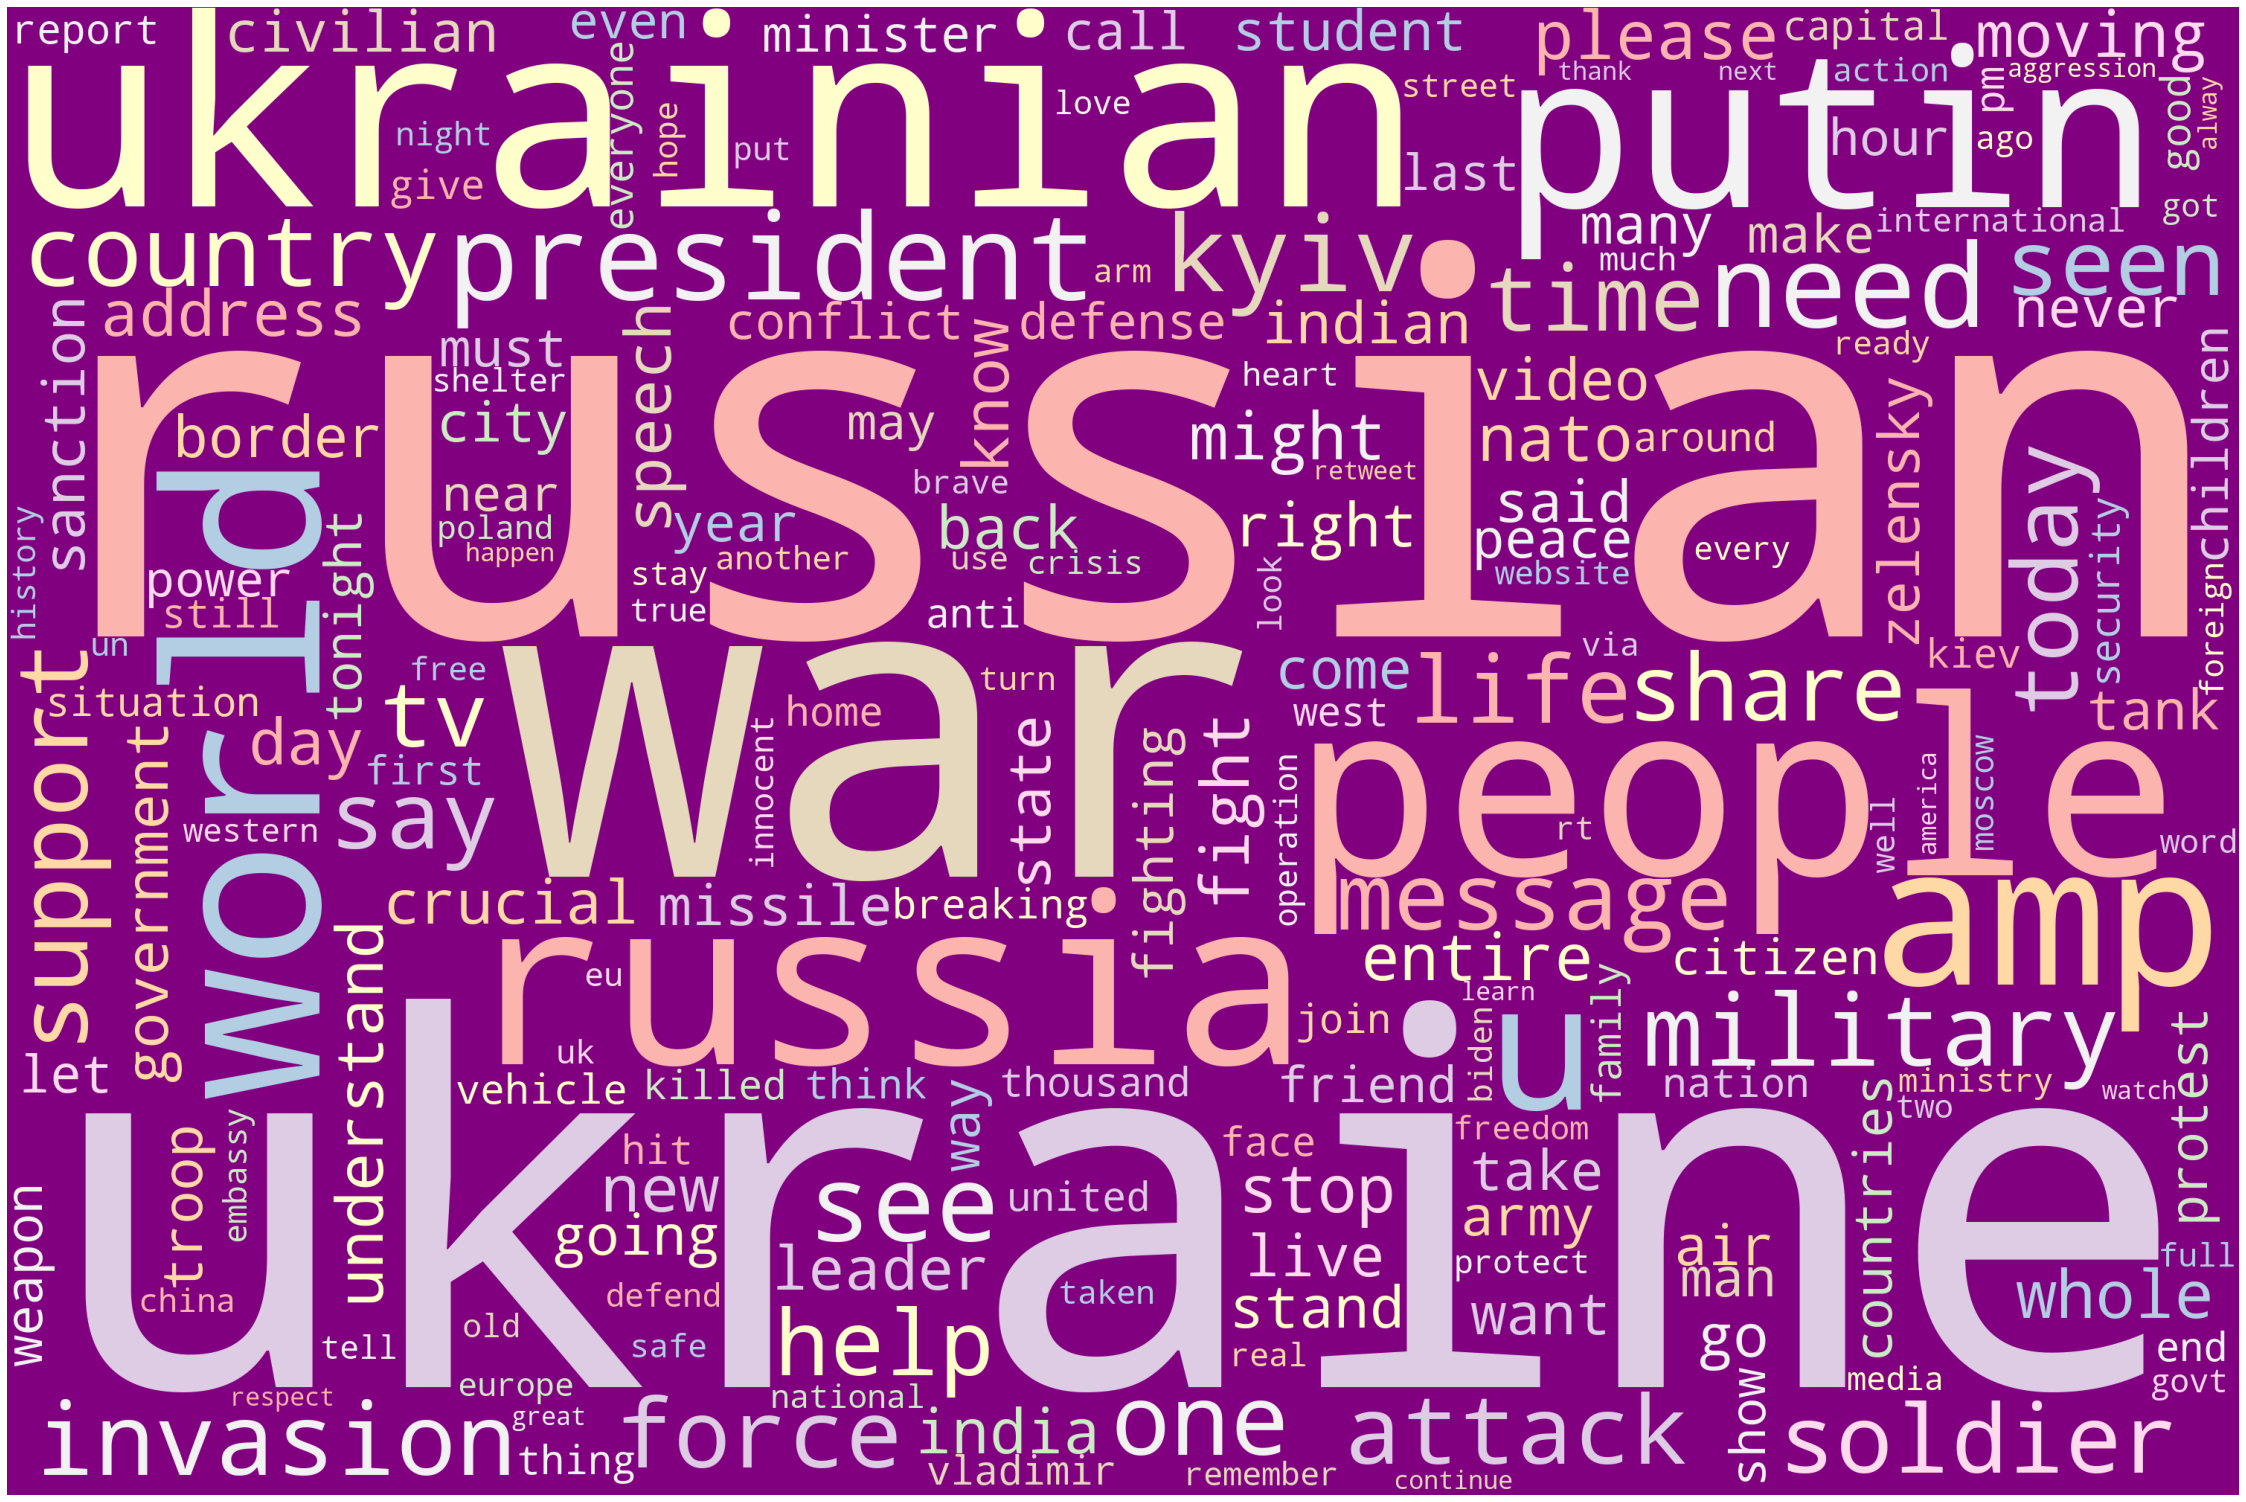

In [19]:
# create word cloud with most frequent words
text = cleaned_tweets_df["text_without_stopwords"].values
words = ' '.join([words for words in text])
wordcloud = WordCloud(width= 3000, height = 2000, background_color="purple", colormap='Pastel1', random_state=1, collocations=False).generate(words)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
# Save image
wordcloud.to_file("resources/images/wordcloud_nltk.png")

In [20]:
word_count = Counter(words.split()).most_common()
word_count

[('ukraine', 30443),
 ('russian', 28889),
 ('war', 20332),
 ('people', 17852),
 ('ukrainian', 16934),
 ('russia', 16004),
 ('putin', 13868),
 ('world', 13570),
 ('amp', 12361),
 ('president', 8968),
 ('us', 8064),
 ('kyiv', 7046),
 ('see', 7035),
 ('invasion', 6322),
 ('military', 6266),
 ('country', 6161),
 ('support', 5702),
 ('one', 5699),
 ('message', 5519),
 ('life', 5458),
 ('share', 5371),
 ('seen', 5339),
 ('today', 5171),
 ('tv', 5112),
 ('help', 5021),
 ('please', 4926),
 ('needs', 4829),
 ('ever', 4715),
 ('whole', 4657),
 ('like', 4581),
 ('might', 4535),
 ('would', 4506),
 ('fight', 4503),
 ('stop', 4482),
 ('entire', 4425),
 ('nato', 4393),
 ('understand', 4392),
 ('attack', 4321),
 ('forces', 4314),
 ('moving', 4311),
 ('speech', 4293),
 ('time', 4258),
 ('address', 4219),
 ('india', 3972),
 ('crucial', 3915),
 ('know', 3884),
 ('soldiers', 3732),
 ('go', 3686),
 ('government', 3653),
 ('ukrainians', 3645),
 ('need', 3568),
 ('says', 3538),
 ('right', 3417),
 ('said', 33

In [ ]:
# cleaned_tweets_df["tokens"] = [nltk.word_tokenize(sentence) for sentence in cleaned_tweets_df["text_without_stopwords"]]
# cleaned_tweets_df